# Pandas
## 1 Overview
Pandas是python的一个快速有效的分析工具的包  
Pandas的功能： 
- 1.定义了处理数据的基本结构   
- 2.赋予它们方便操作的方法，如  
 - 读取数据  
 - 调整指数  
 - 处理日期和时间序列  
 - 排序，分组，重新排序和一般数据管理  
（Wikipedia defines munging as cleaning data from one raw form into a structured, purged one）  
 - 处理缺失值等  
更复杂的统计功能留给其他软件包，例如建立在Pandas之上的statsmodels和scikit-learn

In [1]:
import pandas as pd
import numpy as np

## 2 Series

由Pandas定义的两个重要数据类型是Series和DataFrame<br>
Series相当于数据的“列”，例如，单个变量的观察值集合<br>
DataFrame是用于存储相关数据列的对象

In [2]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    1.019794
1   -1.501536
2   -0.398697
3    0.424619
Name: daily returns, dtype: float64

Series数据是基于numpy的array结构的，所以Series支持相似的运算。

In [3]:
s * 100

0    101.979362
1   -150.153611
2    -39.869716
3     42.461864
Name: daily returns, dtype: float64

In [4]:
np.abs(s)

0    1.019794
1    1.501536
2    0.398697
3    0.424619
Name: daily returns, dtype: float64

Series与numpy相比有着更加高级的特性，它不仅有许多额外的算法，像描述性统计，还有更加灵活的索引。

In [5]:
s.describe()

count    4.000000
mean    -0.113955
std      1.092689
min     -1.501536
25%     -0.674407
50%      0.012961
75%      0.573412
max      1.019794
Name: daily returns, dtype: float64

In [6]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    1.019794
AAPL   -1.501536
MSFT   -0.398697
GOOG    0.424619
Name: daily returns, dtype: float64

由此来看，Series就像快速高效的Python字典(dict)，只不过这个字典中的项都具有相同类型，在本例中为float。<br>
事实上，Series也可以使用许多dict的语法。

In [7]:
s['AMZN'] #根据key查找value

1.0197936231868139

In [8]:
s['AMZN'] = 0 #给key赋值
s

AMZN    0.000000
AAPL   -1.501536
MSFT   -0.398697
GOOG    0.424619
Name: daily returns, dtype: float64

In [9]:
'AAPL' in s #判断key是否存在

True

## 3 DataFrames

Series相当于单列数据，DataFrame相当于几列数据，每个变量一列，类似于（高度优化的）Excel电子表格。<br>
它是可以用于表示和分析自然地组织成行和列的数据的强大工具，通常具有用于单独行和单独列的描述性索引。<br>
DataFrame读入csv文件十分方便,我们来看一个从CSV文件pandas / data / test_pwt.csv中读取数据的例子。

利用read_csv()函数读取csv文件，csv文件中的数据就组成了一个DataFrame。

In [10]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [11]:
df 

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [12]:
df[2:5] #索引切片选取2-5行

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [13]:
df[['country', 'tcgdp']] #选取列，用包含列名的list

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [14]:
df.iloc[2:5,0:4] #既要选择特定的行又要选择特定的列时，运用iloc[rows,columns]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [15]:
df.loc[df.index[2:5], ['country', 'tcgdp']] #列除了可以用整数索引表示，还可以用标签

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [16]:
df = df[['country','POP','tcgdp']] #将某几列选出，替代旧表,也可以生成新表
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [17]:
df = df.set_index('country') #将某一列的变量作为索引
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [18]:
df.columns  = 'population', 'total GDP' #修改列的名称（修改变量名）
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [19]:
df['population'] = df['population'] * 1e3 #计算
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [20]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population'] #生成新变量——人均GDP
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


Pandas的DataFrame和Series内置了基于Matplotlib的画图功能
Matplotlib是Python的一个2D绘图库，它以各种硬拷贝格式和跨平台的交互式环境生成出版质量级别的图形。

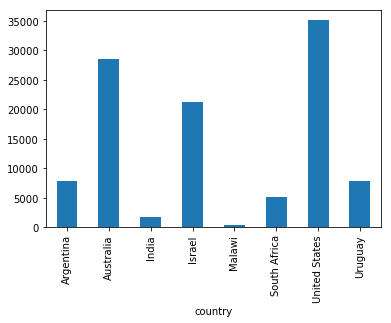

Using matplotlib backend: Qt5Agg


In [21]:
import matplotlib.pyplot as plt

df['GDP percap'].plot(kind='bar') #生成人均GDP的条形图
plt.show()
%matplotlib

In [22]:
df = df.sort_values(by='GDP percap', ascending=True) #按照人均GDP排序，True为升序，False为降序
df

,population,total GDP,GDP percap
country,,,
Malawi,1.180150e+07,5.026222e+03,425.896679
India,1.006300e+09,1.728144e+06,1717.324719
South Africa,4.506410e+07,2.272424e+05,5042.647686
Uruguay,3.219793e+06,2.525596e+04,7843.970620
Argentina,3.733565e+07,2.950722e+05,7903.229085
Israel,6.114570e+06,1.292539e+05,21138.672749
Australia,1.905319e+07,5.418047e+05,28436.433261
United States,2.821720e+08,9.898700e+06,35080.381854


In [23]:
df['GDP percap'].plot(kind='bar')
plt.show()
%matplotlib inline

## 4 On-Line Data Sources

Python可以直接查询在线数据库<br>
例如，经济学类的一个重要数据库——FRED（美联储圣路易斯数据库收录了48个数据库来源，共计有61,465个经济指标时间序列）<br>
假设我们对失业率感兴趣，通过FRED，美国失业率的相关数据可以直接下载<br>
https://fred.stlouisfed.org

In [24]:
import requests

r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv') #1948/1/1-2018/2/1

如果此处有错误，有两个可能的原因：  
- 1.没有联网  
- 2.你的计算机是通过代理服务商获得网络，python没有意识到这一点，有以下两种处理方案：  
 - 换一台计算机  
 - 解决代理问题

In [25]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [26]:
source[1]

'1948-01-01,3.4\r'

In [27]:
source[2]

'1948-02-01,3.8\r'

还有其他代码将上述文本解析成数组，不过，其实read_csv函数就可以完成这个任务。<br>
我们使用代码parse_dates = True，使Pandas识别我们的日期列，以便进行简单的日期筛选。

In [28]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [29]:
type(data)

pandas.core.frame.DataFrame

In [30]:
data.head()  # A useful method to get a quick look at a data frame 默认展示5个

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [31]:
data.tail()  # A useful method to get a quick look at a data frame 默认展示5个

,VALUE
DATE,
2017-11-01,4.1
2017-12-01,4.1
2018-01-01,4.1
2018-02-01,4.1
2018-03-01,4.1


In [32]:
pd.set_option('precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,843.0
mean,5.8
std,1.6
min,2.5
25%,4.6
50%,5.6
75%,6.8
max,10.8


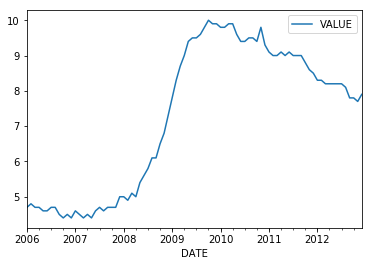

In [33]:
data['2006':'2012'].plot()
plt.show()   #画失业率折线图
%matplotlib inline

运用政府债务与GDP比率的数据，将Excel文件读入Pandas DataFrames，并将美国和澳大利亚的时间序列数据绘制成图。

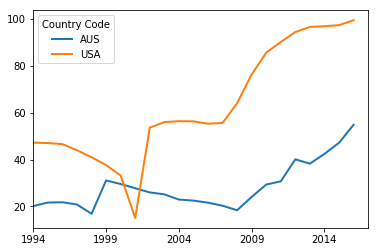

In [34]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

# == Get data and read into file gd.xls == #
wb_data_query = "http://api.worldbank.org/v2/en/indicator/gc.dod.totl.gd.zs?downloadformat=excel"
r = requests.get(wb_data_query)
with open('gd.xls', 'wb') as output:
    output.write(r.content)

# == Parse data into a DataFrame == #
govt_debt = pd.read_excel('gd.xls', sheetname='Data', skiprows=3, index_col=1)

# == Take desired values and plot == #
govt_debt = govt_debt.transpose()
govt_debt = govt_debt[['AUS', 'USA']]
govt_debt = govt_debt[38:]
govt_debt.plot(lw=2)
plt.show()
%matplotlib inline

## 5 Exercises
### Exercise 1

编写一个程序，计算2013年以下股票的价格变化百分比

In [35]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

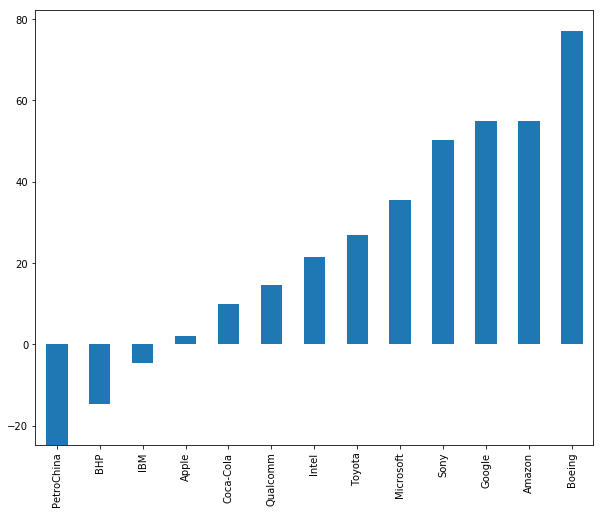

In [36]:
ticker = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')
ticker.set_index('Date', inplace=True)

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

price_change = pd.Series()

for tick in ticker_list:  #计算价格变化
    change = 100 * (ticker.loc[ticker.index[-1], tick] - ticker.loc[ticker.index[0], tick]) / ticker.loc[ticker.index[0], tick]
    name = ticker_list[tick]
    price_change[name] = change

price_change.sort_values(inplace=True) #排序
fig, ax = plt.subplots(figsize=(10,8)) #设置坐标轴
price_change.plot(kind='bar', ax=ax)
plt.show()
%matplotlib inline